In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def imshow(image=None, title=None, size=10):
    assert image is not None, 'The image is not provided'
    w, h = image.shape[0], image.shape[1]
    aspectRatio = h/w
    plt.figure(figsize=(size*aspectRatio, size))
    if len(image.shape)>2:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap='gray')
        
    plt.axis('off')
    plt.title(title)
    plt.show()

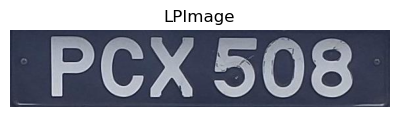

In [3]:
image = cv2.imread('./images/LP.jpg')
imshow(image, 'LPImage', 1)

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresholdedImage = cv2.threshold(gray, 127,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

### Erote the image

In [5]:
kernal = np.ones((2, 2), np.uint8)
erosion = cv2.erode(thresholdedImage, kernal, iterations=2)

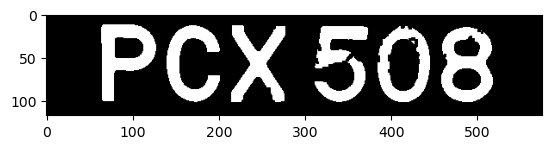

In [6]:
# imshow(thresholdedImage, 'BinarizedImage')
plt.imshow(erosion, 'gray')

### Dilate the image

In [7]:
# Dilation
dilated = cv2.dilate(erosion, kernal, iterations=2)

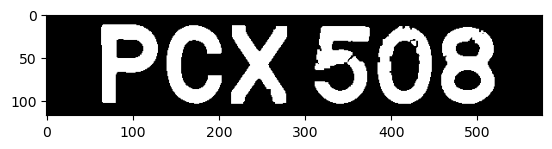

In [8]:
# imshow(thresholdedImage, 'BinarizedImage')
plt.imshow(dilated, 'gray')

In [9]:
contours, _= cv2.findContours(dilated, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
len(contours)

12

In [10]:
resultImage = cv2.drawContours(image.copy(), contours, -1, (0,255,0), 2)

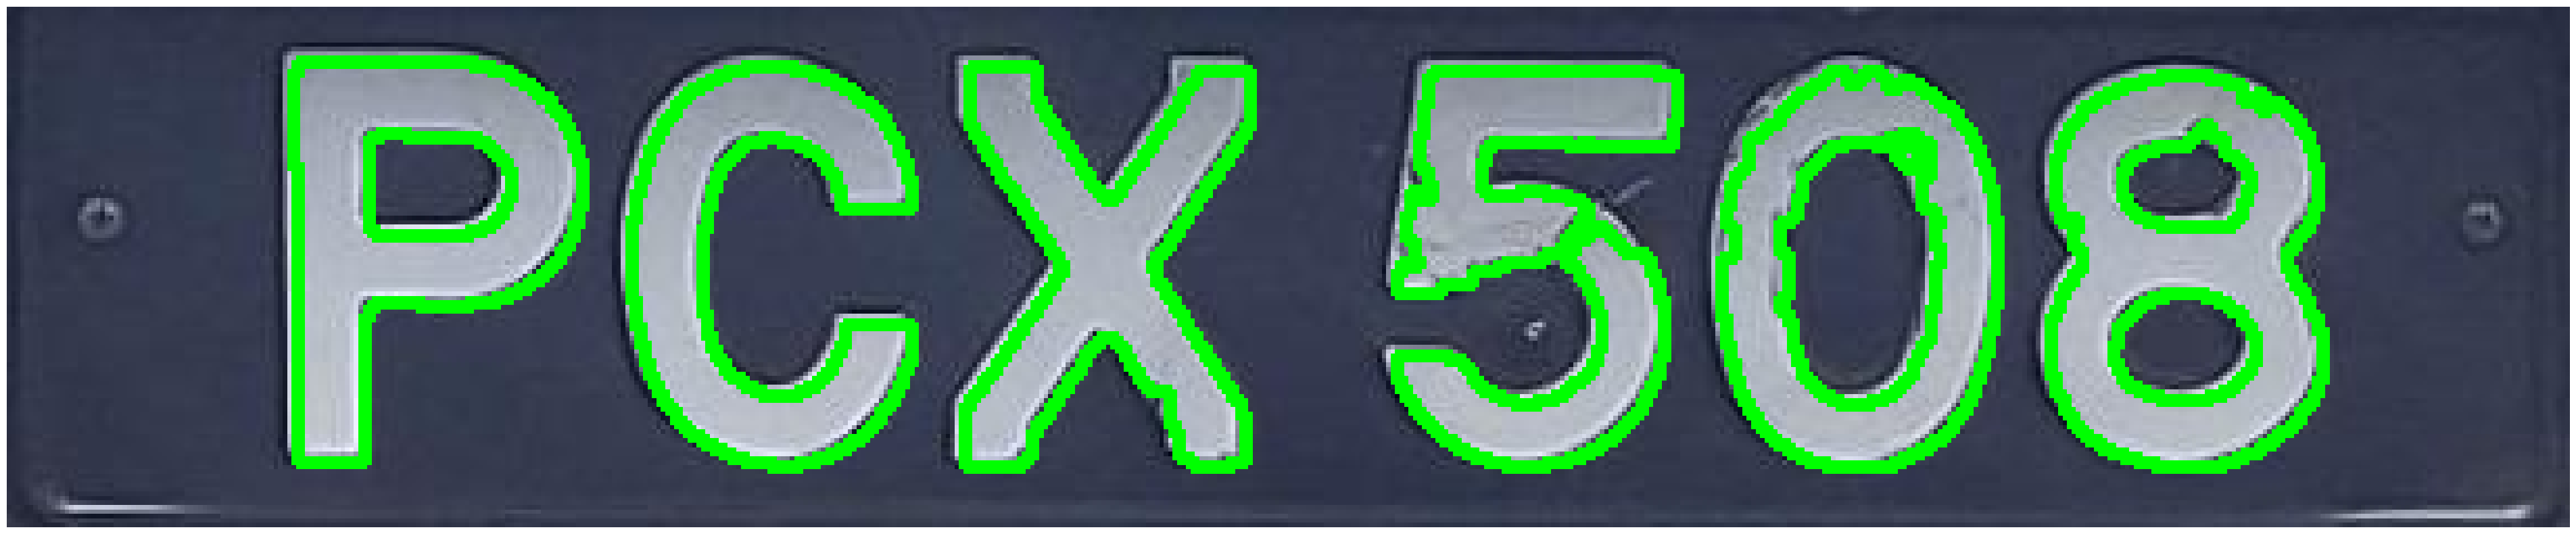

In [11]:
imshow(resultImage)

## Scan Image 

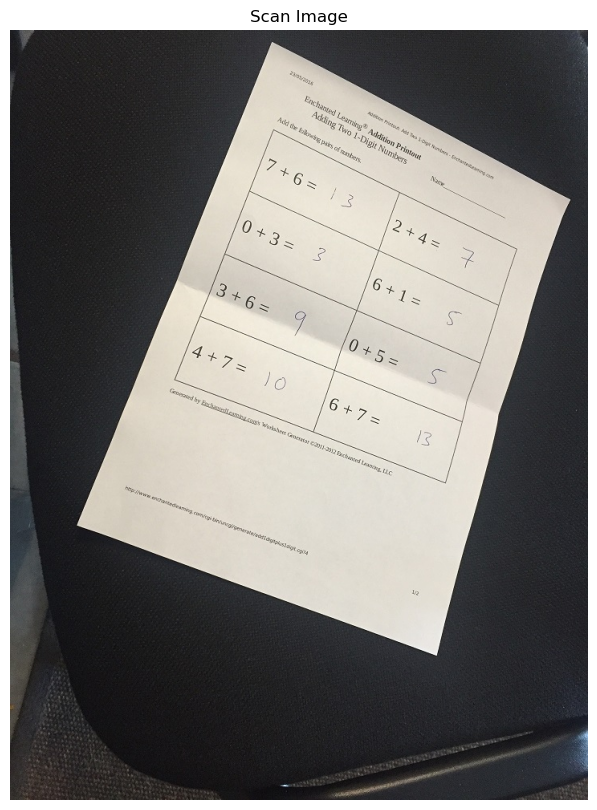

In [12]:
img = cv2.imread('./images/scan.jpg')
imshow(img, 'Scan Image')

In [13]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 127,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

contours, h= cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"Found total contours: {len(contours)}")

Found total contours: 54


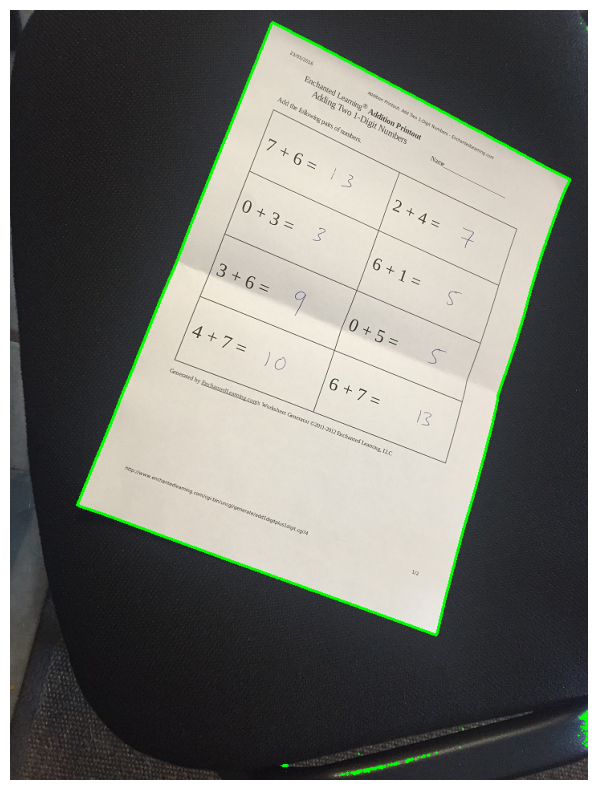

In [14]:
resultImage = cv2.drawContours(img.copy(), contours, -1, (0,255,0), 2)
imshow(resultImage)

In [15]:
sortedContours = sorted(contours, key=cv2.contourArea, reverse=True)
print(len(sortedContours[0]))

for cnt in sortedContours:
    perimeters = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.05*perimeters, True)
    
    if len(approx) == 4:
        break

print(f"Our Approximated Points are: \n {approx}")

1494
Our Approximated Points are: 
 [[[326  15]]

 [[ 83 617]]

 [[531 779]]

 [[697 211]]]


In [16]:
print(sortedContours[0][0])
minP =np.min( sortedContours[0])
maxP = np.max(sortedContours[0])
print(minP, maxP)

[[326  15]]
15 779


In [17]:
inPts = np.float32(approx)
outPts = np.float32([
    [0,0],
    [0,800],
    [500,800],
    [500,0]
])
outPts

array([[  0.,   0.],
       [  0., 800.],
       [500., 800.],
       [500.,   0.]], dtype=float32)

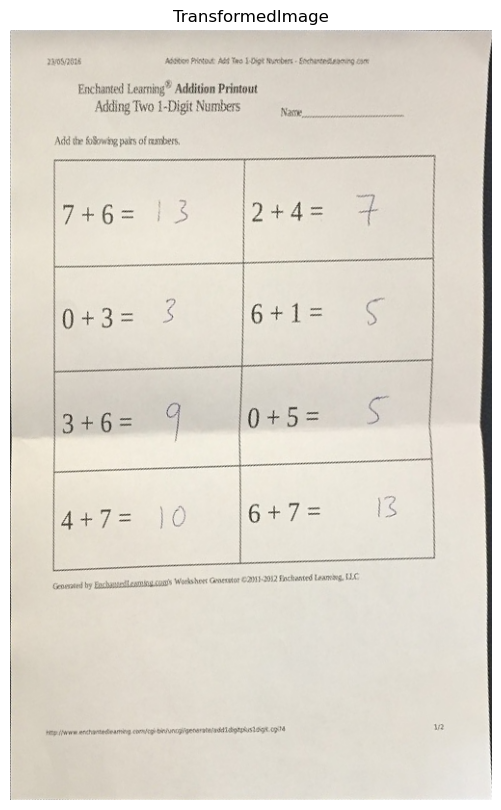

In [18]:
M = cv2.getPerspectiveTransform(inPts, outPts)
outPutImage = cv2.warpPerspective(img, M, (500,800))
imshow(outPutImage, 'TransformedImage')